In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load the Data

In [22]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#### Exploratory Data Analysis

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [24]:
df.shape

(5572, 5)

In [25]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [26]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [27]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [28]:
# Drop unnecessary columns
df = df[['v1', 'v2']]
# Rename 
df.columns = ['label', 'text']

In [29]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

C:\Users\HP\AppData\Local\Temp\ipykernel_17480\2851929608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [30]:
df.head(5)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df1 = df.copy()

##### Visualization

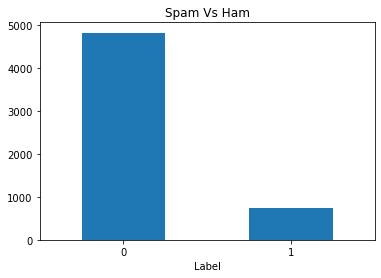

In [32]:
df1['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.title('Spam Vs Ham')
plt.xticks(rotation=360)
plt.show();

#### Data Cleaning

In [33]:
df1.duplicated().sum()

403

In [34]:
df1.drop_duplicates(inplace=True)
print(df.shape,df1.shape)

(5572, 2) (5169, 2)


In [35]:
# check for duplicates
print(df.duplicated().sum())
print(df1.duplicated().sum())

403
0


In [36]:
df1.describe()

,label
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


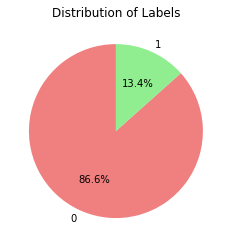

In [43]:
plt.pie(df['label'].value_counts(), labels=df['label'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Labels')
plt.show()

#### Data Preprocessing

In [37]:
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords

# Tokenizers divide strings into lists of substrings.

def preprocess_text(text):
    text = text.lower()
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    # remove stop words like 'the','over' etc.....
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
df1['text'] = df1['text'].apply(preprocess_text)
df1

,label,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5567,1,nd time tried contact u u pound prize claim ea...
5568,0,b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...


#### Splitting the data

In [44]:
x = df['text']
y = df['label']

#### Training and Testing Data

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Feature Engineering

#### Count Vectorization

In [48]:
# method represents the frequency of each word in a document
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x_train_c = cv.fit_transform(x_train)
x_test_c  = cv.transform(x_test)

### Naive Bayes Classifier

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb = MultinomialNB()
nb.fit(x_train_c,y_train)

y_pred1 = nb.predict(x_test_c)

accuracy1 = accuracy_score(y_test,y_pred1)*100
print(f'Accuracy of Naive Bayes Model: {accuracy1}')

Accuracy of Naive Bayes Model: 98.38565022421525


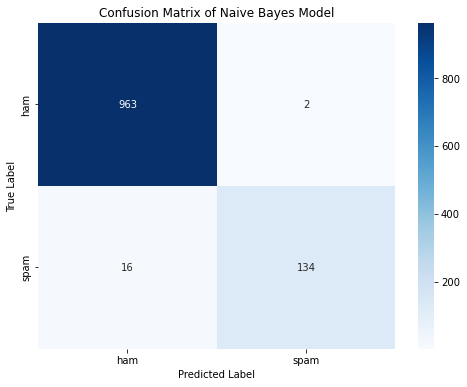

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Naive Bayes Model')
plt.show()

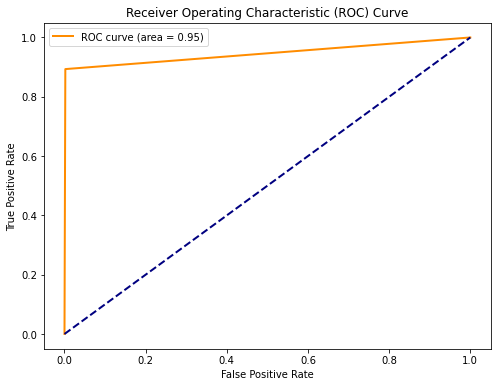

In [57]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)    ### falsepostive_rate,truepositive_rate

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [64]:
print('Classification Report:')
print(classification_report(y_test, y_pred1,target_names=['ham', 'spam']))

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



#### SUPPORT VECTOR MACHINE

In [89]:
from sklearn.svm import SVC

vm = SVC()
vm.fit(x_train_c,y_train)
y_pred2 = vm.predict(x_test_c)

accuracy2 = accuracy_score(y_test,y_pred2)*100
print(f'Accuracy of Naive Bayes Model: {accuracy2}')

Accuracy of Naive Bayes Model: 97.9372197309417


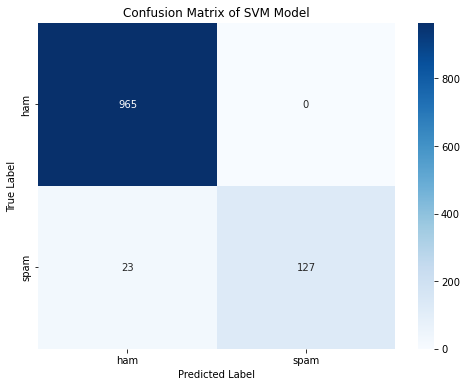

In [71]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of SVM Model')
plt.show()

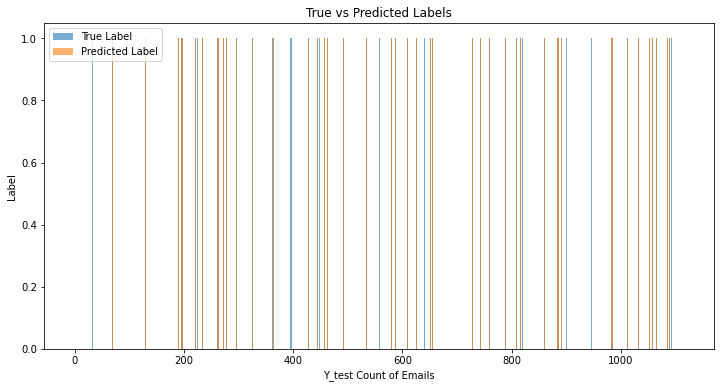

In [85]:
instances = np.arange(len(y_test))

plt.figure(figsize=(12, 6))
plt.bar(instances, y_test, label='True Label', alpha=0.6)
plt.bar(instances, y_pred2, label='Predicted Label', alpha=0.6)

plt.xlabel('Y_test Count of Emails')
plt.ylabel('Label')
plt.legend()
plt.title('True vs Predicted Labels')
plt.show()

In [86]:
print('Classification Report:')
print(classification_report(y_test, y_pred2,target_names=['ham', 'spam']))

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



#### Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_c,y_train)
y_pred3 = rf.predict(x_test_c)

accuracy3 = accuracy_score(y_test, y_pred3) *100
print(f'Random Forest Accuracy: {accuracy3}')

Random Forest Accuracy: 97.57847533632287


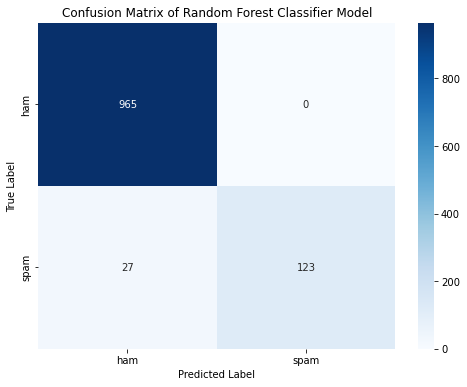

In [91]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Random Forest Classifier Model')
plt.show()

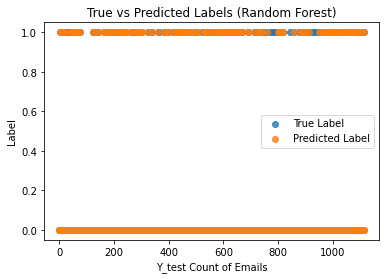

In [101]:
plt.scatter(range(len(y_test)), y_test, label='True Label', alpha=0.8)
plt.scatter(range(len(y_pred3)), y_pred3, label='Predicted Label', alpha=0.8)
plt.xlabel('Y_test Count of Emails')
plt.ylabel('Label')
plt.legend()
plt.title('True vs Predicted Labels (Random Forest)')
plt.show()


In [102]:
print('Classification Report:')
print(classification_report(y_test, y_pred3,target_names=['ham', 'spam']))

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



#### Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(x_train_c,y_train)
y_pred4 = lr.predict(x_test_c)

accuracy4 = accuracy_score(y_test, y_pred4)*100
print(f'Logistic Regression Accuracy: {accuracy4}')


Logistic Regression Accuracy: 97.847533632287


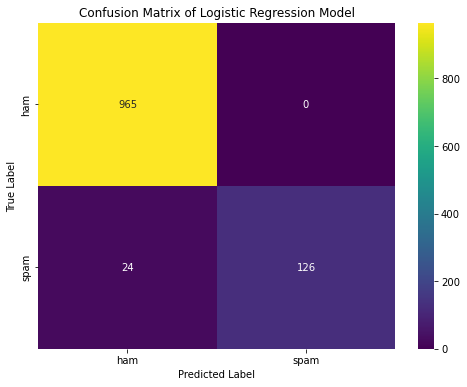

In [104]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)

plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='viridis', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()

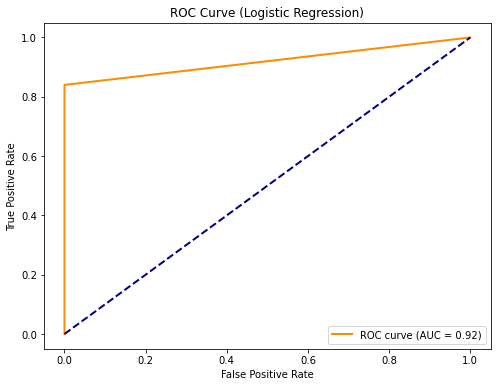

In [110]:
fpr, tpr, _ = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show();

In [113]:
models = ['Naive Bayes Classifier','SVC','RandomForest Classifier','Logistic Regressor']
accuracy_values = [accuracy1,accuracy2,accuracy3,accuracy4]

df2 = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_values
})

df2 = df2.sort_values(by='Accuracy',ascending=False)

df2

,Model,Accuracy
0,Naive Bayes Classifier,98.385650
1,SVC,97.937220
3,Logistic Regressor,97.847534
2,RandomForest Classifier,97.578475


### Intuition : 
* ***The Naive Bayes Classifier achieved the highest accuracy among the models, suggesting that it performed well in distinguishing between spam and non-spam emails in your dataset.***


* ***Naive Bayes is known  especially for text classification tasks like spam detection. The high accuracy may be attributed to the effectiveness of its probabilistic approach in handling text data.***

In [114]:
df1

,label,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5567,1,nd time tried contact u u pound prize claim ea...
5568,0,b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...


In [116]:
user_input_text = input("Enter the text: ")
user_df = pd.DataFrame({'text': [user_input_text]})
user_count = cv.transform(user_df['text'])

predict = nb.predict(user_count)
predict = predict[0]

print(f"The predicted class is: {predict}")

Enter the text: b going esplanade fr home
The predicted class is: 0
